# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("/content/Company_Data.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA and Data Visulizations

In [4]:
df1=pd.Series(df['Sales'])
s=[]
for i in df1:
  if i>9:
    s.append('good')
  else:
    s.append('bad')
print(s)

['good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad'

In [5]:
df1=pd.DataFrame(s)
df2=pd.concat([df1,df],axis=1)
df2=df2.rename({0:'o/p'},axis=1)
df2

,o/p,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,good,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,bad,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,bad,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,good,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,bad,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,bad,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,bad,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
le=LabelEncoder()

In [7]:
df2['Urban']=le.fit_transform(df2['Urban'])
df2['US']=le.fit_transform(df2['US'])
df2['o/p']=le.fit_transform(df2['o/p'])

In [8]:
df2

,o/p,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,1,1
1,1,11.22,111,48,16,260,83,Good,65,10,1,1
2,1,10.06,113,35,10,269,80,Medium,59,12,1,1
3,0,7.40,117,100,4,466,97,Medium,55,14,1,1
4,0,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,12.57,138,108,17,203,128,Good,33,14,1,1
396,0,6.14,139,23,3,37,120,Medium,55,11,0,1
397,0,7.41,162,26,12,368,159,Medium,40,18,1,1
398,0,5.94,100,79,7,284,95,Bad,50,12,1,1


In [9]:
df2['ShelveLoc']=df2['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [10]:
df2

,o/p,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,3,42,17,1,1
1,1,11.22,111,48,16,260,83,1,65,10,1,1
2,1,10.06,113,35,10,269,80,2,59,12,1,1
3,0,7.40,117,100,4,466,97,2,55,14,1,1
4,0,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,12.57,138,108,17,203,128,1,33,14,1,1
396,0,6.14,139,23,3,37,120,2,55,11,0,1
397,0,7.41,162,26,12,368,159,2,40,18,1,1
398,0,5.94,100,79,7,284,95,3,50,12,1,1


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   o/p          400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    int64  
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    int64  
 11  US           400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


<Axes: >

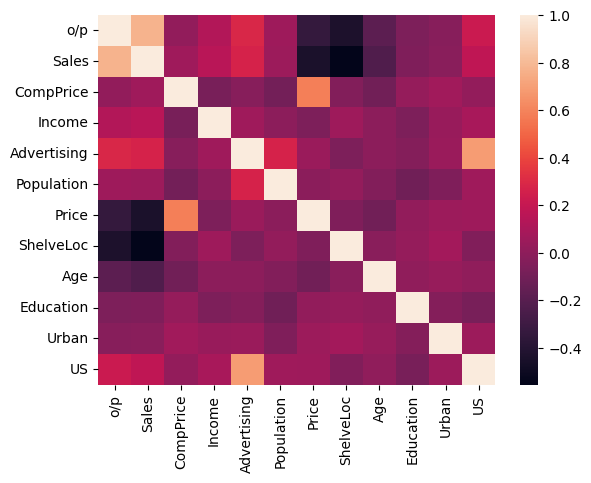

In [13]:
sns.heatmap(df2.corr())

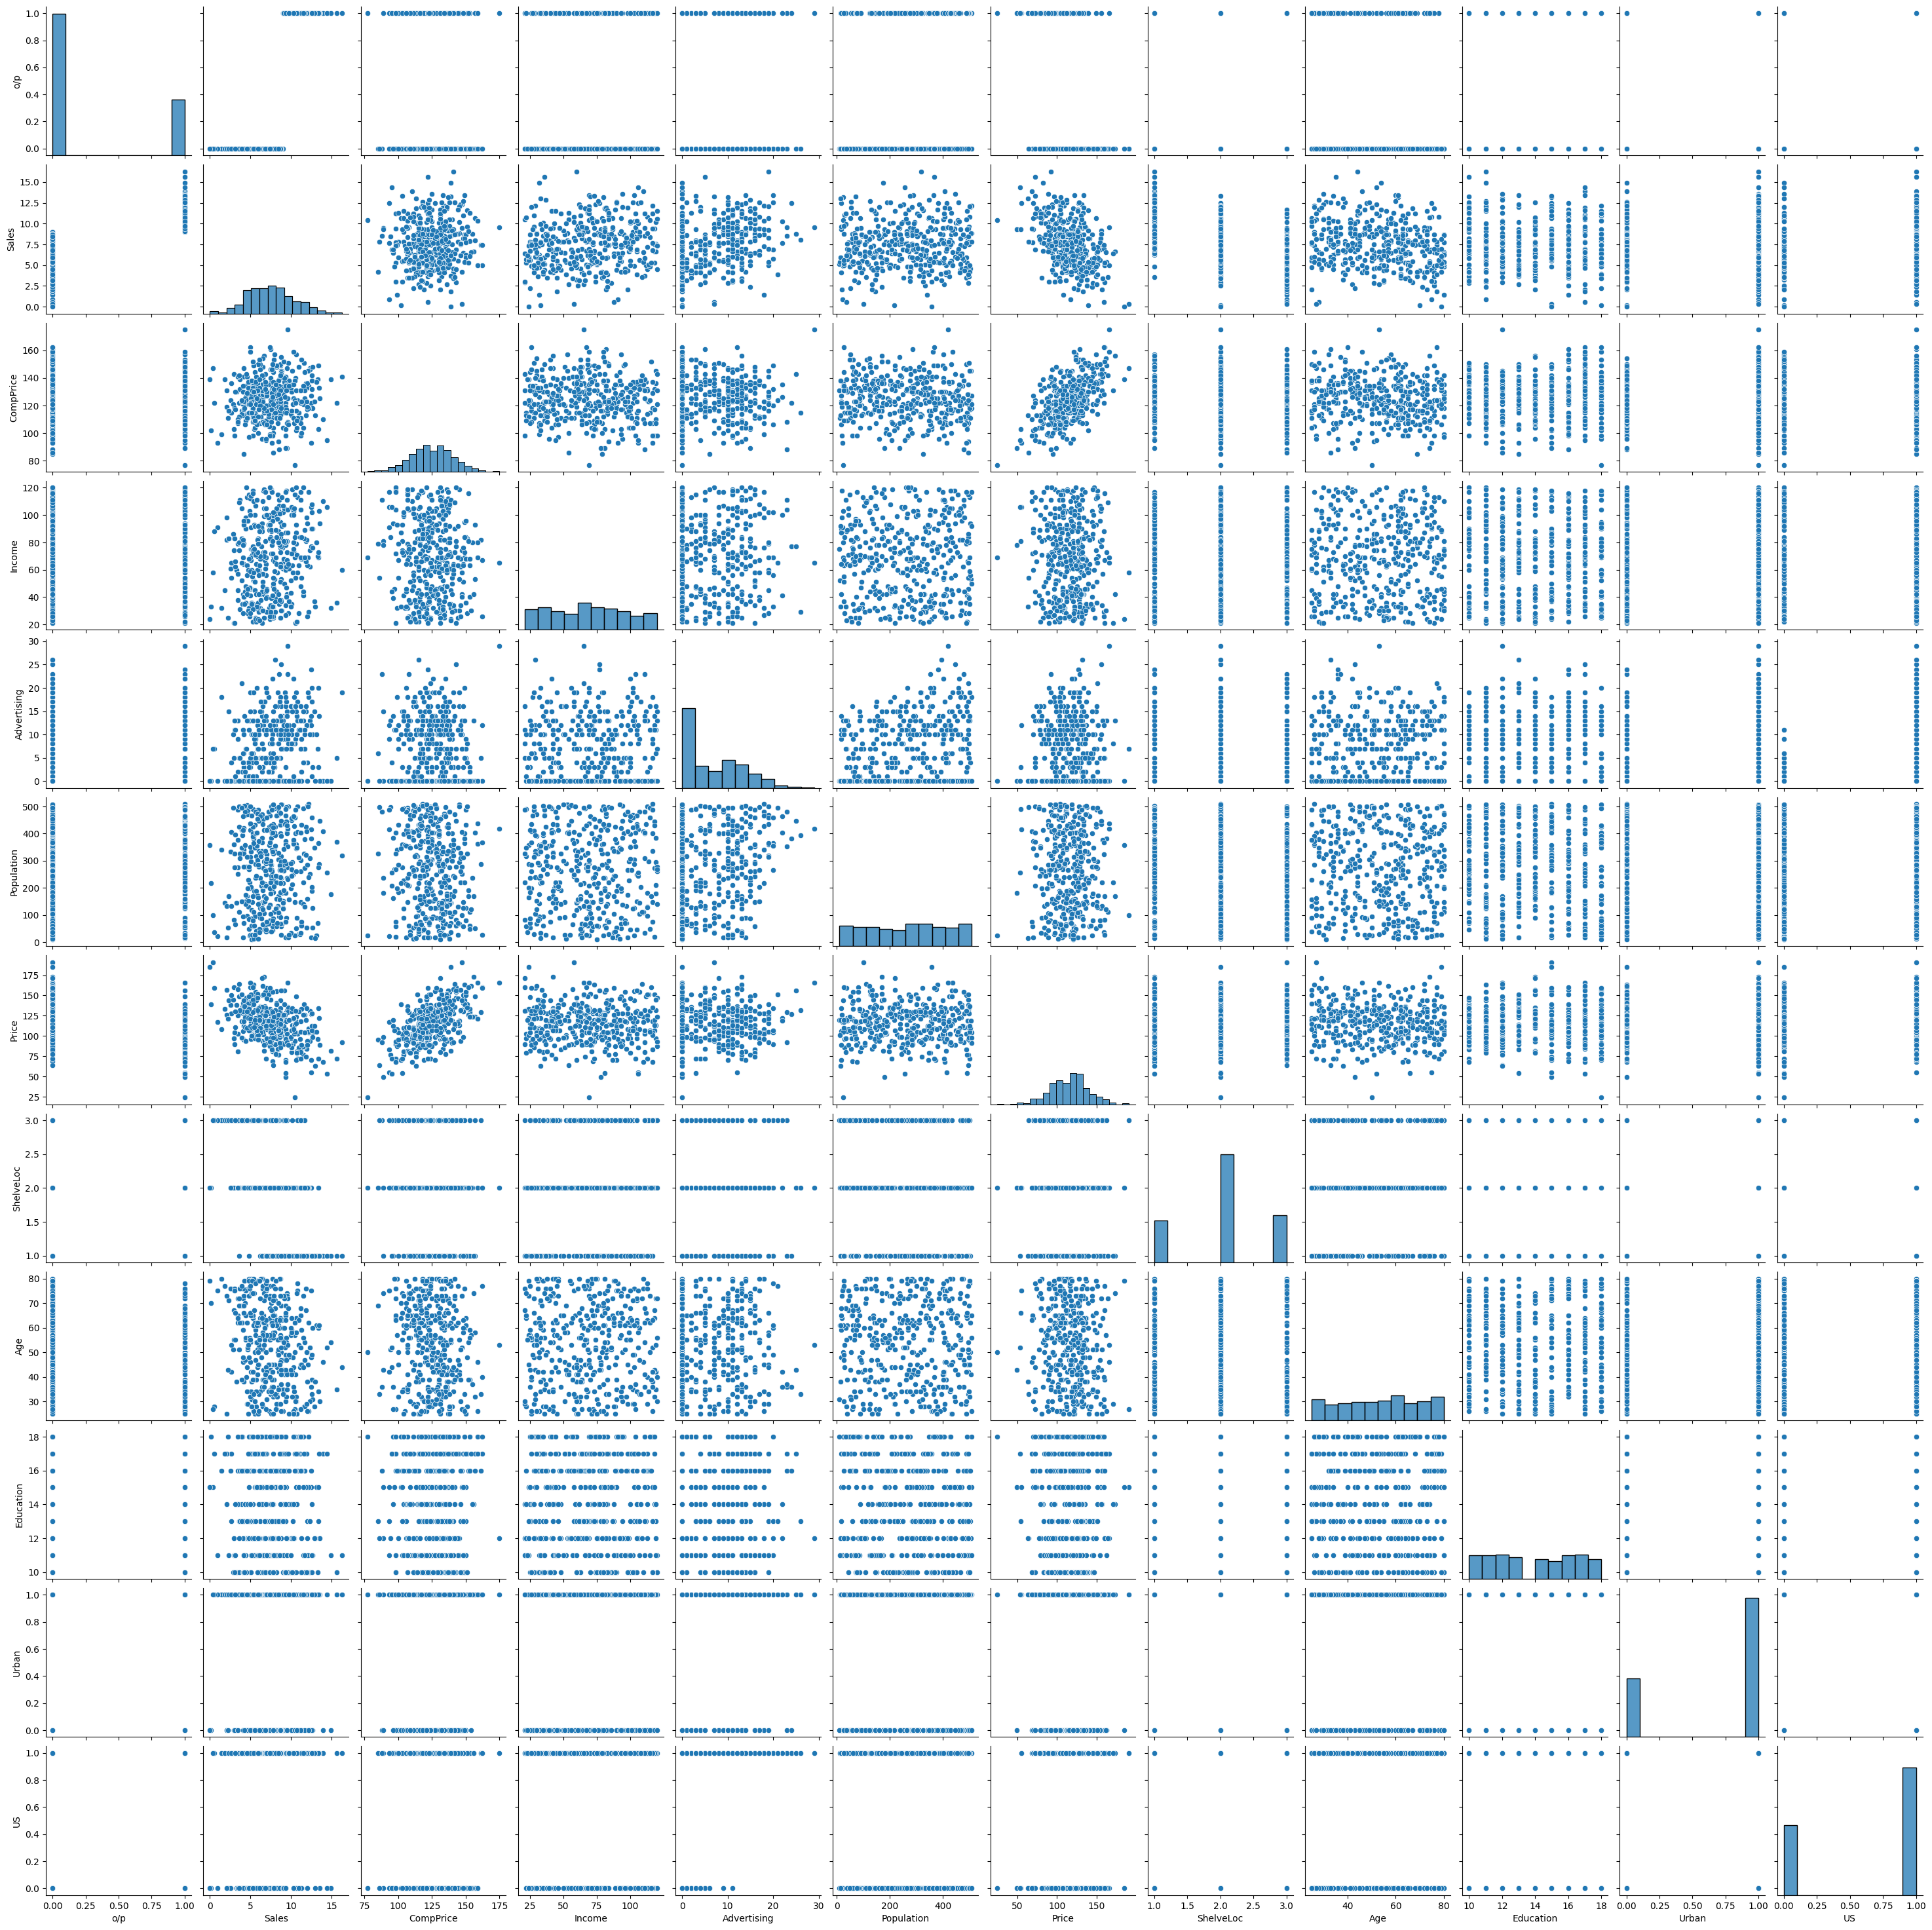

In [14]:
sns.pairplot(df2)

# Feature Scaling

In [15]:
X=df2.iloc[:,2:10]
Y=df2.iloc[:,0]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=45)

# Random Forest Algorithm using Entropy

In [ ]:
kf=KFold(n_splits=10,random_state=45,shuffle=True)

In [ ]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=300,max_features=3)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=300)

In [ ]:
res=cross_val_score(rf,x_train,y_train,cv=kf)

In [ ]:
res.mean()

0.8625

In [ ]:
ypred=rf.predict(x_test)

In [ ]:
ypred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
accuracy_score(y_test,ypred)

0.8375

# Random Forest with Gini Index

In [ ]:
rf1 = RandomForestClassifier(criterion = "gini",n_estimators=300,max_features=3)
rf1.fit(x_train,y_train)
ypred1=rf1.predict(x_test)
ypred1

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
accuracy_score(y_test,ypred1)

0.8375

In [ ]:
res1=cross_val_score(rf1,x_train,y_train,cv=kf)

In [ ]:
res1.mean()

0.85625